In [1]:
import sys
sys.path.append("../Modules/")
sys.path.append("../")
import os

import pandas as pd
import numpy as np

from configobj import ConfigObj
from configobj import flatten_errors
from validate import Validator
    
import logging

#fmt = 'logging.Formatter(''%(levelname)s_%(name)s-%(funcName)s(): - %(message)s'
fmt = '%(levelname)s_%(name)s-%(funcName)s(): - %(message)s'
logging.basicConfig(level=logging.INFO, format=fmt)
logger = logging.getLogger(__name__)


In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
from chart_studio.plotly import plot, iplot
import chart_studio.plotly as py

In [4]:
from plotly.graph_objs import *
import plotly.graph_objs as go

# Subject number

In [5]:
subNum = 1;
trIdx = 9;
gazeConfidenceThreshold = 0.6;

### Load dataframe
Remember to set loadParsedData, loadProcessedData.

In [6]:
dataFolderList = [];
[dataFolderList.append(name) for name in os.listdir("../Data/") if name[0] is not '.'];

dataParentFolder = "../Data/" + dataFolderList[subNum];

dataSubFolderList = [];
[dataSubFolderList.append(name) for name in os.listdir("../Data/" + dataParentFolder) if name[0] is not '.'];

dataFolder = dataParentFolder + '/' + dataSubFolderList[0] + '/' 

gazeDataFolderList = [];
[gazeDataFolderList.append(name) for name in os.listdir(dataFolder + 'PupilData') if name[0] is not '.'];

pupilSessionFolder = '/' + gazeDataFolderList[0] +  '/' 

gazeDataFolder = dataFolder + 'PupilData' + pupilSessionFolder

In [7]:
trialData = pd.read_csv( dataFolder + 'trial_results.csv')

In [8]:
trDataFiles = [i for i in trialData.columns.to_list() if '_filename' in i] 

In [9]:
logger.info('Processing subject: ' + trialData.iloc[trIdx]['ppid'] + ' t = ' + str(trialData.iloc[trIdx]['trial_num']))

INFO___main__-<module>(): - Processing subject: P_200825164747 t = 10


Rename trial data columns

In [10]:
trialData.rename(columns={"session_num":"sessionNum","trial_num":"trialNum",
                         "block_num":"blockNum","trial_num_in_block":"trialNumInBlock",
                         "start_time":"startTime","end_time":"endTime"},inplace=True)

In [11]:
# [c for c in trialData.columns[:-len(trDataFiles)]]

Get ball data

In [12]:
dataFileName = trialData.iloc[trIdx]['ball_movement_filename']
ballData = pd.read_csv( dataFolder + dataFileName)
ballData = ballData.rename(columns={"time": "frameTime"})
ballData.head()

,frameTime,pos_x,pos_y,pos_z,rot_x,rot_y,rot_z
0,67.93307,-5.2766,1.8389,18.0,0.0,0.0,0.0
1,67.95444,-5.2766,1.8389,18.0,0.0,0.0,0.0
2,67.96196,-5.2766,1.8389,18.0,0.0,0.0,0.0
3,67.97730,-5.2766,1.8389,18.0,0.0,0.0,0.0
4,67.98752,-5.2766,1.8389,18.0,0.0,0.0,0.0


In [13]:
ballData.rename(columns={"pos_x": "ballPos_x", "pos_y": "ballPos_y","pos_z": "ballPos_z"},inplace=True)
ballData.rename(columns={"rot_x": "ballRot_x", "rot_y": "ballRot_y","rot_z": "ballRot_z"},inplace=True)
ballData.head()

,frameTime,ballPos_x,ballPos_y,ballPos_z,ballRot_x,ballRot_y,ballRot_z
0,67.93307,-5.2766,1.8389,18.0,0.0,0.0,0.0
1,67.95444,-5.2766,1.8389,18.0,0.0,0.0,0.0
2,67.96196,-5.2766,1.8389,18.0,0.0,0.0,0.0
3,67.97730,-5.2766,1.8389,18.0,0.0,0.0,0.0
4,67.98752,-5.2766,1.8389,18.0,0.0,0.0,0.0


In [14]:
dataFileName = trialData.iloc[trIdx]['paddle_movement_filename']
paddleData = pd.read_csv( dataFolder + dataFileName)
paddleData = paddleData.rename(columns={"time": "frameTime"})
paddleData.head()

,frameTime,paddlePos_x,paddlePos_y,paddlePos_z,paddleRot_x,paddleRot_y,paddleRot_z,paddle_4x4_R0C0,paddle_4x4_R0C1,paddle_4x4_R0C2,paddle_4x4_R0C3,paddle_4x4_R1C0,paddle_4x4_R1C1,paddle_4x4_R1C2,paddle_4x4_R1C3,paddle_4x4_R2C0,paddle_4x4_R2C1,paddle_4x4_R2C2,paddle_4x4_R2C3,paddle_4x4_R3C0,paddle_4x4_R3C1,paddle_4x4_R3C2,paddle_4x4_R3C3
0,67.93307,0.1934,0.7777,0.1328,348.3416,119.2427,35.2886,-0.5006,0.1383,0.8546,0.1934,0.5658,0.7994,0.2021,0.7777,-0.6552,0.5847,-0.4784,0.1328,0,0,0,1
1,67.95444,0.1846,0.7737,0.1311,347.5574,119.1006,36.5491,-0.5028,0.1384,0.8532,0.1846,0.5815,0.7845,0.2155,0.7737,-0.6395,0.6045,-0.4749,0.1311,0,0,0,1
2,67.96196,0.1831,0.7729,0.1300,346.7617,118.4532,37.0216,-0.5016,0.1261,0.8558,0.1831,0.5861,0.7772,0.2290,0.7729,-0.6363,0.6165,-0.4638,0.1300,0,0,0,1
3,67.97730,0.1782,0.7700,0.1297,346.3436,117.8983,37.5807,-0.4981,0.1200,0.8588,0.1782,0.5926,0.7701,0.2361,0.7700,-0.6330,0.6265,-0.4547,0.1297,0,0,0,1
4,67.98752,0.1756,0.7688,0.1284,346.2472,117.1542,37.9953,-0.4899,0.1143,0.8643,0.1756,0.5979,0.7655,0.2377,0.7688,-0.6344,0.6333,-0.4433,0.1284,0,0,0,1


In [15]:
dataFileName = trialData.iloc[trIdx]['camera_movement_filename']
viewData = pd.read_csv( dataFolder + dataFileName)
viewData = viewData.rename(columns={"time": "frameTime"})
viewData.head()

,frameTime,cameraPos_x,cameraPos_y,cameraPos_z,cameraRot_x,cameraRot_y,cameraRot_z,camera_4x4_R0C0,camera_4x4_R0C1,camera_4x4_R0C2,camera_4x4_R0C3,camera_4x4_R1C0,camera_4x4_R1C1,camera_4x4_R1C2,camera_4x4_R1C3,camera_4x4_R2C0,camera_4x4_R2C1,camera_4x4_R2C2,camera_4x4_R2C3,camera_4x4_R3C0,camera_4x4_R3C1,camera_4x4_R3C2,camera_4x4_R3C3
0,67.93307,0.0181,1.1742,0.0169,355.0290,347.0309,359.0662,0.9740,0.0353,-0.2236,0.0181,-0.0162,0.9961,0.0867,1.1742,0.2258,-0.0808,0.9708,0.0169,0,0,0,1
1,67.95444,0.0180,1.1743,0.0173,355.0685,346.8601,359.1134,0.9734,0.0346,-0.2265,0.0180,-0.0154,0.9962,0.0860,1.1743,0.2286,-0.0802,0.9702,0.0173,0,0,0,1
2,67.96196,0.0180,1.1743,0.0176,355.0546,346.5492,359.1435,0.9722,0.0346,-0.2317,0.0180,-0.0149,0.9962,0.0862,1.1743,0.2338,-0.0804,0.9689,0.0176,0,0,0,1
3,67.97730,0.0179,1.1745,0.0178,355.0314,346.4028,359.1470,0.9716,0.0348,-0.2342,0.0179,-0.0148,0.9961,0.0866,1.1745,0.2363,-0.0807,0.9683,0.0178,0,0,0,1
4,67.98752,0.0177,1.1745,0.0180,354.9908,346.2746,359.1393,0.9710,0.0353,-0.2364,0.0177,-0.0150,0.9961,0.0873,1.1745,0.2385,-0.0812,0.9677,0.0180,0,0,0,1


In [16]:
if( len(ballData) == 0 ):
    rawTrialData = viewData.reindex(viewData.columns.union(ballData.columns), axis=1)
else:
    rawTrialData = pd.merge(viewData, ballData, on ='frameTime',validate= 'one_to_many')

if( len(paddleData) == 0 ):
    rawTrialData = rawTrialData.reindex(viewData.columns.union(paddleData.columns), axis=1)
else:
    rawTrialData = pd.merge(rawTrialData, paddleData, on ='frameTime',validate= 'one_to_many')

In [17]:
dataFileName = trialData.iloc[trIdx]['pupil_pupilTimeStamp_filename']
pupilTimestampData = pd.read_csv( dataFolder + dataFileName)
pupilTimestampData = pupilTimestampData.rename(columns={"time": "frameTime"})

rawTrialData = pd.merge( rawTrialData, pupilTimestampData, on ='frameTime',validate= 'one_to_many')

In [18]:
rawTrialData['trialNumber'] = trialData.iloc[trIdx]['trialNum'].astype(int)
rawTrialData['blockNumber'] = trialData.iloc[trIdx]['blockNum'].astype(int)
rawTrialData.head()

,frameTime,cameraPos_x,cameraPos_y,cameraPos_z,cameraRot_x,cameraRot_y,cameraRot_z,camera_4x4_R0C0,camera_4x4_R0C1,camera_4x4_R0C2,camera_4x4_R0C3,camera_4x4_R1C0,camera_4x4_R1C1,camera_4x4_R1C2,camera_4x4_R1C3,camera_4x4_R2C0,camera_4x4_R2C1,camera_4x4_R2C2,camera_4x4_R2C3,camera_4x4_R3C0,camera_4x4_R3C1,camera_4x4_R3C2,camera_4x4_R3C3,ballPos_x,ballPos_y,ballPos_z,ballRot_x,ballRot_y,ballRot_z,paddlePos_x,paddlePos_y,paddlePos_z,paddleRot_x,paddleRot_y,paddleRot_z,paddle_4x4_R0C0,paddle_4x4_R0C1,paddle_4x4_R0C2,paddle_4x4_R0C3,paddle_4x4_R1C0,paddle_4x4_R1C1,paddle_4x4_R1C2,paddle_4x4_R1C3,paddle_4x4_R2C0,paddle_4x4_R2C1,paddle_4x4_R2C2,paddle_4x4_R2C3,paddle_4x4_R3C0,paddle_4x4_R3C1,paddle_4x4_R3C2,paddle_4x4_R3C3,pupilTimestamp,trialNumber,blockNumber
0,67.93307,0.0181,1.1742,0.0169,355.0290,347.0309,359.0662,0.9740,0.0353,-0.2236,0.0181,-0.0162,0.9961,0.0867,1.1742,0.2258,-0.0808,0.9708,0.0169,0,0,0,1,-5.2766,1.8389,18.0,0.0,0.0,0.0,0.1934,0.7777,0.1328,348.3416,119.2427,35.2886,-0.5006,0.1383,0.8546,0.1934,0.5658,0.7994,0.2021,0.7777,-0.6552,0.5847,-0.4784,0.1328,0,0,0,1,195179.861880,10,2
1,67.95444,0.0180,1.1743,0.0173,355.0685,346.8601,359.1134,0.9734,0.0346,-0.2265,0.0180,-0.0154,0.9962,0.0860,1.1743,0.2286,-0.0802,0.9702,0.0173,0,0,0,1,-5.2766,1.8389,18.0,0.0,0.0,0.0,0.1846,0.7737,0.1311,347.5574,119.1006,36.5491,-0.5028,0.1384,0.8532,0.1846,0.5815,0.7845,0.2155,0.7737,-0.6395,0.6045,-0.4749,0.1311,0,0,0,1,195179.871700,10,2
2,67.96196,0.0180,1.1743,0.0176,355.0546,346.5492,359.1435,0.9722,0.0346,-0.2317,0.0180,-0.0149,0.9962,0.0862,1.1743,0.2338,-0.0804,0.9689,0.0176,0,0,0,1,-5.2766,1.8389,18.0,0.0,0.0,0.0,0.1831,0.7729,0.1300,346.7617,118.4532,37.0216,-0.5016,0.1261,0.8558,0.1831,0.5861,0.7772,0.2290,0.7729,-0.6363,0.6165,-0.4638,0.1300,0,0,0,1,195179.885262,10,2
3,67.97730,0.0179,1.1745,0.0178,355.0314,346.4028,359.1470,0.9716,0.0348,-0.2342,0.0179,-0.0148,0.9961,0.0866,1.1745,0.2363,-0.0807,0.9683,0.0178,0,0,0,1,-5.2766,1.8389,18.0,0.0,0.0,0.0,0.1782,0.7700,0.1297,346.3436,117.8983,37.5807,-0.4981,0.1200,0.8588,0.1782,0.5926,0.7701,0.2361,0.7700,-0.6330,0.6265,-0.4547,0.1297,0,0,0,1,195179.895967,10,2
4,67.98752,0.0177,1.1745,0.0180,354.9908,346.2746,359.1393,0.9710,0.0353,-0.2364,0.0177,-0.0150,0.9961,0.0873,1.1745,0.2385,-0.0812,0.9677,0.0180,0,0,0,1,-5.2766,1.8389,18.0,0.0,0.0,0.0,0.1756,0.7688,0.1284,346.2472,117.1542,37.9953,-0.4899,0.1143,0.8643,0.1756,0.5979,0.7655,0.2377,0.7688,-0.6344,0.6333,-0.4433,0.1284,0,0,0,1,195179.913062,10,2


#  Import gaze data

In [19]:
gazeDataFolderList = []
[gazeDataFolderList.append(name) for name in os.listdir(dataFolder + 'PupilData') if name[0] is not '.']

pupilSessionFolder = '/' + gazeDataFolderList[0] 
gazeDataFolder = dataFolder + 'PupilData' + pupilSessionFolder

try:
    pupilExportsFolder = []
    [pupilExportsFolder.append(name) for name in os.listdir(gazeDataFolder + '/Exports') if name[0] is not '.']

    # Defaults to the most recent pupil export folder (highest number)
    gazePositionsDF = pd.read_csv( gazeDataFolder + '/Exports/' + pupilExportsFolder[-1] + '/gaze_positions.csv' )
    gazePositionsDF.head()
except:
    logger.exception('No gaze_positions.csv.  Process and export data in Pupil Player.')
    

In [20]:
gazePositionsDF.sort_values(by='gaze_timestamp',inplace=True)
gazePositionsDF.head()

,gaze_timestamp,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,eye_center0_3d_y,eye_center0_3d_z,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z
0,195116.681054,0,0.437825,0.337137,0.539335,195116.681054-1,-121.524829,-22.013275,484.655571,NaN,NaN,NaN,NaN,NaN,NaN,-30.657558,-5.052262,-6.725608,-0.181735,-0.033922,0.982762
1,195116.681077,0,0.308368,0.366180,0.220798,195116.681077-0,-96.498014,150.999620,468.369144,34.079146,6.07695,7.992097,-0.261154,0.289845,0.920754,NaN,NaN,NaN,NaN,NaN,NaN
2,195116.689657,0,0.191602,0.429266,0.191887,195116.68965699998-0,-51.524213,168.327063,473.123225,34.079146,6.07695,7.992097,-0.171207,0.324500,0.930262,NaN,NaN,NaN,NaN,NaN,NaN
3,195116.689675,0,0.423367,0.364199,0.446656,195116.68967499997-1,-101.810136,29.993751,486.943398,NaN,NaN,NaN,NaN,NaN,NaN,-30.657558,-5.052262,-6.725608,-0.142305,0.070092,0.987338
4,195116.696106,0,0.408250,0.355184,0.437223,195116.696106-1,-108.262289,35.198688,485.572439,NaN,NaN,NaN,NaN,NaN,NaN,-30.657558,-5.052262,-6.725608,-0.155209,0.080502,0.984596


In [21]:
gazePositionsDF = gazePositionsDF.rename(columns={"gaze_timestamp": "pupilTimestamp"})

# Filter by confidence

* For each trial, find the window of gaze data in gazePositionsDF, and interpolate to match those timestamps.  Then, merge, and append.

In [22]:
gbBlTr = rawTrialData.groupby(['blockNumber','trialNumber'])
tr = gbBlTr.get_group( list(gbBlTr.groups.keys())[0])

firstTS = tr.head(1)['pupilTimestamp']
lastTS = tr.tail(1)['pupilTimestamp']
firstIdx = list(map(lambda i: i> float(firstTS), gazePositionsDF['pupilTimestamp'])).index(True) 
lastIdx = list(map(lambda i: i> float(lastTS), gazePositionsDF['pupilTimestamp'])).index(True) 
rawGazeData = gazePositionsDF.loc[firstIdx:lastIdx]


In [23]:
filteredGazeData = rawGazeData.reset_index().drop(np.where(rawGazeData['confidence'] < gazeConfidenceThreshold )[0])

rawTrialData.head()

,frameTime,cameraPos_x,cameraPos_y,cameraPos_z,cameraRot_x,cameraRot_y,cameraRot_z,camera_4x4_R0C0,camera_4x4_R0C1,camera_4x4_R0C2,camera_4x4_R0C3,camera_4x4_R1C0,camera_4x4_R1C1,camera_4x4_R1C2,camera_4x4_R1C3,camera_4x4_R2C0,camera_4x4_R2C1,camera_4x4_R2C2,camera_4x4_R2C3,camera_4x4_R3C0,camera_4x4_R3C1,camera_4x4_R3C2,camera_4x4_R3C3,ballPos_x,ballPos_y,ballPos_z,ballRot_x,ballRot_y,ballRot_z,paddlePos_x,paddlePos_y,paddlePos_z,paddleRot_x,paddleRot_y,paddleRot_z,paddle_4x4_R0C0,paddle_4x4_R0C1,paddle_4x4_R0C2,paddle_4x4_R0C3,paddle_4x4_R1C0,paddle_4x4_R1C1,paddle_4x4_R1C2,paddle_4x4_R1C3,paddle_4x4_R2C0,paddle_4x4_R2C1,paddle_4x4_R2C2,paddle_4x4_R2C3,paddle_4x4_R3C0,paddle_4x4_R3C1,paddle_4x4_R3C2,paddle_4x4_R3C3,pupilTimestamp,trialNumber,blockNumber
0,67.93307,0.0181,1.1742,0.0169,355.0290,347.0309,359.0662,0.9740,0.0353,-0.2236,0.0181,-0.0162,0.9961,0.0867,1.1742,0.2258,-0.0808,0.9708,0.0169,0,0,0,1,-5.2766,1.8389,18.0,0.0,0.0,0.0,0.1934,0.7777,0.1328,348.3416,119.2427,35.2886,-0.5006,0.1383,0.8546,0.1934,0.5658,0.7994,0.2021,0.7777,-0.6552,0.5847,-0.4784,0.1328,0,0,0,1,195179.861880,10,2
1,67.95444,0.0180,1.1743,0.0173,355.0685,346.8601,359.1134,0.9734,0.0346,-0.2265,0.0180,-0.0154,0.9962,0.0860,1.1743,0.2286,-0.0802,0.9702,0.0173,0,0,0,1,-5.2766,1.8389,18.0,0.0,0.0,0.0,0.1846,0.7737,0.1311,347.5574,119.1006,36.5491,-0.5028,0.1384,0.8532,0.1846,0.5815,0.7845,0.2155,0.7737,-0.6395,0.6045,-0.4749,0.1311,0,0,0,1,195179.871700,10,2
2,67.96196,0.0180,1.1743,0.0176,355.0546,346.5492,359.1435,0.9722,0.0346,-0.2317,0.0180,-0.0149,0.9962,0.0862,1.1743,0.2338,-0.0804,0.9689,0.0176,0,0,0,1,-5.2766,1.8389,18.0,0.0,0.0,0.0,0.1831,0.7729,0.1300,346.7617,118.4532,37.0216,-0.5016,0.1261,0.8558,0.1831,0.5861,0.7772,0.2290,0.7729,-0.6363,0.6165,-0.4638,0.1300,0,0,0,1,195179.885262,10,2
3,67.97730,0.0179,1.1745,0.0178,355.0314,346.4028,359.1470,0.9716,0.0348,-0.2342,0.0179,-0.0148,0.9961,0.0866,1.1745,0.2363,-0.0807,0.9683,0.0178,0,0,0,1,-5.2766,1.8389,18.0,0.0,0.0,0.0,0.1782,0.7700,0.1297,346.3436,117.8983,37.5807,-0.4981,0.1200,0.8588,0.1782,0.5926,0.7701,0.2361,0.7700,-0.6330,0.6265,-0.4547,0.1297,0,0,0,1,195179.895967,10,2
4,67.98752,0.0177,1.1745,0.0180,354.9908,346.2746,359.1393,0.9710,0.0353,-0.2364,0.0177,-0.0150,0.9961,0.0873,1.1745,0.2385,-0.0812,0.9677,0.0180,0,0,0,1,-5.2766,1.8389,18.0,0.0,0.0,0.0,0.1756,0.7688,0.1284,346.2472,117.1542,37.9953,-0.4899,0.1143,0.8643,0.1756,0.5979,0.7655,0.2377,0.7688,-0.6344,0.6333,-0.4433,0.1284,0,0,0,1,195179.913062,10,2


In [24]:
firstTS

0    195179.86188
Name: pupilTimestamp, dtype: float64

In [25]:
lastTS

285    195183.353225
Name: pupilTimestamp, dtype: float64

In [26]:
firstIdx

15343

In [27]:
lastIdx

16199

# Merge rawTrialData and trGazeData 

In [28]:
# print(len(rawTrialData['pupilTimestamp'].unique()))
# print(len(rawTrialData['pupilTimestamp']))

In [29]:
# print( len(rawTrialData) + len(trGazeData) )

In [30]:
interpDF = pd.merge( rawTrialData, filteredGazeData, on ='pupilTimestamp',how='outer')
interpDF = interpDF.interpolate(method='linear',downcast='infer')
len(interpDF)

1084

# Convert to a multilevel index

In [31]:
interpDF.head()

,frameTime,cameraPos_x,cameraPos_y,cameraPos_z,cameraRot_x,cameraRot_y,cameraRot_z,camera_4x4_R0C0,camera_4x4_R0C1,camera_4x4_R0C2,camera_4x4_R0C3,camera_4x4_R1C0,camera_4x4_R1C1,camera_4x4_R1C2,camera_4x4_R1C3,camera_4x4_R2C0,camera_4x4_R2C1,camera_4x4_R2C2,camera_4x4_R2C3,camera_4x4_R3C0,camera_4x4_R3C1,camera_4x4_R3C2,camera_4x4_R3C3,ballPos_x,ballPos_y,ballPos_z,ballRot_x,ballRot_y,ballRot_z,paddlePos_x,paddlePos_y,paddlePos_z,paddleRot_x,paddleRot_y,paddleRot_z,paddle_4x4_R0C0,paddle_4x4_R0C1,paddle_4x4_R0C2,paddle_4x4_R0C3,paddle_4x4_R1C0,paddle_4x4_R1C1,paddle_4x4_R1C2,paddle_4x4_R1C3,paddle_4x4_R2C0,paddle_4x4_R2C1,paddle_4x4_R2C2,paddle_4x4_R2C3,paddle_4x4_R3C0,paddle_4x4_R3C1,paddle_4x4_R3C2,paddle_4x4_R3C3,pupilTimestamp,trialNumber,blockNumber,index,world_index,confidence,norm_pos_x,norm_pos_y,base_data,gaze_point_3d_x,gaze_point_3d_y,gaze_point_3d_z,eye_center0_3d_x,eye_center0_3d_y,eye_center0_3d_z,gaze_normal0_x,gaze_normal0_y,gaze_normal0_z,eye_center1_3d_x,eye_center1_3d_y,eye_center1_3d_z,gaze_normal1_x,gaze_normal1_y,gaze_normal1_z
0,67.93307,0.0181,1.1742,0.0169,355.0290,347.0309,359.0662,0.9740,0.0353,-0.2236,0.0181,-0.0162,0.9961,0.0867,1.1742,0.2258,-0.0808,0.9708,0.0169,0,0,0,1,-5.2766,1.8389,18.0,0.0,0.0,0.0,0.1934,0.7777,0.1328,348.3416,119.2427,35.2886,-0.5006,0.1383,0.8546,0.1934,0.5658,0.7994,0.2021,0.7777,-0.6552,0.5847,-0.4784,0.1328,0,0,0,1,195179.861880,10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,67.95444,0.0180,1.1743,0.0173,355.0685,346.8601,359.1134,0.9734,0.0346,-0.2265,0.0180,-0.0154,0.9962,0.0860,1.1743,0.2286,-0.0802,0.9702,0.0173,0,0,0,1,-5.2766,1.8389,18.0,0.0,0.0,0.0,0.1846,0.7737,0.1311,347.5574,119.1006,36.5491,-0.5028,0.1384,0.8532,0.1846,0.5815,0.7845,0.2155,0.7737,-0.6395,0.6045,-0.4749,0.1311,0,0,0,1,195179.871700,10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,67.96196,0.0180,1.1743,0.0176,355.0546,346.5492,359.1435,0.9722,0.0346,-0.2317,0.0180,-0.0149,0.9962,0.0862,1.1743,0.2338,-0.0804,0.9689,0.0176,0,0,0,1,-5.2766,1.8389,18.0,0.0,0.0,0.0,0.1831,0.7729,0.1300,346.7617,118.4532,37.0216,-0.5016,0.1261,0.8558,0.1831,0.5861,0.7772,0.2290,0.7729,-0.6363,0.6165,-0.4638,0.1300,0,0,0,1,195179.885262,10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,67.97730,0.0179,1.1745,0.0178,355.0314,346.4028,359.1470,0.9716,0.0348,-0.2342,0.0179,-0.0148,0.9961,0.0866,1.1745,0.2363,-0.0807,0.9683,0.0178,0,0,0,1,-5.2766,1.8389,18.0,0.0,0.0,0.0,0.1782,0.7700,0.1297,346.3436,117.8983,37.5807,-0.4981,0.1200,0.8588,0.1782,0.5926,0.7701,0.2361,0.7700,-0.6330,0.6265,-0.4547,0.1297,0,0,0,1,195179.895967,10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,67.98752,0.0177,1.1745,0.0180,354.9908,346.2746,359.1393,0.9710,0.0353,-0.2364,0.0177,-0.0150,0.9961,0.0873,1.1745,0.2385,-0.0812,0.9677,0.0180,0,0,0,1,-5.2766,1.8389,18.0,0.0,0.0,0.0,0.1756,0.7688,0.1284,346.2472,117.1542,37.9953,-0.4899,0.1143,0.8643,0.1756,0.5979,0.7655,0.2377,0.7688,-0.6344,0.6333,-0.4433,0.1284,0,0,0,1,195179.913062,10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
def convertColumn(labelIn):

    s = labelIn.split('_')
    labelOut = ''
    
    if len(s) is 2:
        
        # otherwise, its already a scalar
        (first,second) = s
        return (first,second)

    elif len(s) == 3 :
        
        (first,desc,second)= s
        return (first,second)


    else:
        return (labelIn,'')
            
def replaceGazeDataColumns(labelIn):
    
    s = labelIn.split('_')
    
    if( labelIn.split('_')[-1] == 'x' or  labelIn.split('_')[-1] == 'y' or labelIn.split('_')[-1] == 'z' ):
        
        top = '-'.join(labelIn.split('_')[:-1])
        bottom = labelIn.split('_')[-1]
        return (top,bottom)
    
    else:
        
        return (labelIn,'')


Convert interpolated dataframe and gaze dataframe to multiinedex

In [33]:
newColList = [convertColumn(c) for c in interpDF.columns[:len(rawTrialData.columns)]]
newGazeColList = [ replaceGazeDataColumns(c) for c in interpDF.columns[(len(rawTrialData.columns)):] ]
newColList.extend(newGazeColList)
interpDF.columns = pd.MultiIndex.from_tuples(newColList)
interpDF.head()

frameTime cameraPos                 cameraRot                      camera  \
                    x       y       z         x         y         z    R0C0   
0  67.93307    0.0181  1.1742  0.0169  355.0290  347.0309  359.0662  0.9740   
1  67.95444    0.0180  1.1743  0.0173  355.0685  346.8601  359.1134  0.9734   
2  67.96196    0.0180  1.1743  0.0176  355.0546  346.5492  359.1435  0.9722   
3  67.97730    0.0179  1.1745  0.0178  355.0314  346.4028  359.1470  0.9716   
4  67.98752    0.0177  1.1745  0.0180  354.9908  346.2746  359.1393  0.9710   

                                                                           \
     R0C1    R0C2    R0C3    R1C0    R1C1    R1C2    R1C3    R2C0    R2C1   
0  0.0353 -0.2236  0.0181 -0.0162  0.9961  0.0867  1.1742  0.2258 -0.0808   
1  0.0346 -0.2265  0.0180 -0.0154  0.9962  0.0860  1.1743  0.2286 -0.0802   
2  0.0346 -0.2317  0.0180 -0.0149  0.9962  0.0862  1.1743  0.2338 -0.0804   
3  0.0348 -0.2342  0.0179 -0.0148  0.9961  0.0866  1.1745  0.2363 -0.0807   
4  0.0353 -0.2364  0.0177 -0.0150  0.9961  0.0873  1.1745  0.2385 -0.0812   

                                      ballPos               ballRot            \
     R2C2    R2C3 R3C0 R3C1 R3C2 R3C3       x       y     z       x    y    z   
0  0.9708  0.0169    0    0    0    1 -5.2766  1.8389  18.0     0.0  0.0  0.0   
1  0.9702  0.0173    0    0    0    1 -5.2766  1.8389  18.0     0.0  0.0  0.0   
2  0.9689  0.0176    0    0    0    1 -5.2766  1.8389  18.0     0.0  0.0  0.0   
3  0.9683  0.0178    0    0    0    1 -5.2766  1.8389  18.0     0.0  0.0  0.0   
4  0.9677  0.0180    0    0    0    1 -5.2766  1.8389  18.0     0.0  0.0  0.0   

  paddlePos                 paddleRot                     paddle          \
          x       y       z         x         y        z    R0C0    R0C1   
0    0.1934  0.7777  0.1328  348.3416  119.2427  35.2886 -0.5006  0.1383   
1    0.1846  0.7737  0.1311  347.5574  119.1006  36.5491 -0.5028  0.1384   
2    0.1831  0.7729  0.1300  346.7617  118.4532  37.0216 -0.5016  0.1261   
3    0.1782  0.7700  0.1297  346.3436  117.8983  37.5807 -0.4981  0.1200   
4    0.1756  0.7688  0.1284  346.2472  117.1542  37.9953 -0.4899  0.1143   

                                                                           \
     R0C2    R0C3    R1C0    R1C1    R1C2    R1C3    R2C0    R2C1    R2C2   
0  0.8546  0.1934  0.5658  0.7994  0.2021  0.7777 -0.6552  0.5847 -0.4784   
1  0.8532  0.1846  0.5815  0.7845  0.2155  0.7737 -0.6395  0.6045 -0.4749   
2  0.8558  0.1831  0.5861  0.7772  0.2290  0.7729 -0.6363  0.6165 -0.4638   
3  0.8588  0.1782  0.5926  0.7701  0.2361  0.7700 -0.6330  0.6265 -0.4547   
4  0.8643  0.1756  0.5979  0.7655  0.2377  0.7688 -0.6344  0.6333 -0.4433   

                              pupilTimestamp trialNumber blockNumber index  \
     R2C3 R3C0 R3C1 R3C2 R3C3                                                
0  0.1328    0    0    0    1  195179.861880          10           2   NaN   
1  0.1311    0    0    0    1  195179.871700          10           2   NaN   
2  0.1300    0    0    0    1  195179.885262          10           2   NaN   
3  0.1297    0    0    0    1  195179.895967          10           2   NaN   
4  0.1284    0    0    0    1  195179.913062          10           2   NaN   

  world_index confidence norm-pos     base_data gaze-point-3d          \
                                x   y                       x   y   z   
0         NaN        NaN      NaN NaN       NaN           NaN NaN NaN   
1         NaN        NaN      NaN NaN       NaN           NaN NaN NaN   
2         NaN        NaN      NaN NaN       NaN           NaN NaN NaN   
3         NaN        NaN      NaN NaN       NaN           NaN NaN NaN   
4         NaN        NaN      NaN NaN       NaN           NaN NaN NaN   

  eye-center0-3d         gaze-normal0         eye-center1-3d          \
               x   y   z            x   y   z              x   y   z   
0            NaN NaN NaN          NaN NaN NaN            NaN NaN

Assign trial data to interception dataframe or calibration trial dataframe

In [34]:
rawDataDF = False
calibDF = False

if (trialData.iloc[trIdx]['trialType'] == 'interception'):
    if( rawDataDF is False): 
        rawDataDF = interpDF
    else:
        rawDataDF = rawDataDF.append(interpDF)
    
elif(trialData.iloc[trIdx]['trialType'] == 'CalibrationAssessment'):

    if( calibDF is False): 
        calibDF = interpDF
    else:
        calibDF = rawDataDF.append(interpDF)
    

Convert trial data to multiindex

In [35]:
# calibDF.keys()

# Convert trialData to multiindex

In [36]:
newColList = [convertColumn(c) for c in trialData.columns[:-len(trDataFiles)]]
newColList.extend([replaceGazeDataColumns(c) for c in trialData.columns[-len(trDataFiles):]])
trialData.columns = pd.MultiIndex.from_tuples(newColList)
trialData.head()

directory              experiment  \
                                                                        
0  interception_expansion/P_200825164747/S001  interception_expansion   
1  interception_expansion/P_200825164747/S001  interception_expansion   
2  interception_expansion/P_200825164747/S001  interception_expansion   
3  interception_expansion/P_200825164747/S001  interception_expansion   
4  interception_expansion/P_200825164747/S001  interception_expansion   

             ppid sessionNum trialNum blockNum trialNumInBlock startTime  \
                                                                           
0  P_200825164747          1        1        1               1  46.42288   
1  P_200825164747          1        2        1               2  49.11989   
2  P_200825164747          1        3        1               3  50.91666   
3  P_200825164747          1        4        1               4  52.78325   
4  P_200825164747          1        5        1               5  55.35178   

    endTime isCaughtQ contactLocOnPaddle         gazeTargetPositionInHead  \
                                       x   y   z                        x   
0  47.43350       NaN                NaN NaN NaN                -0.633927   
1  50.12606       NaN                NaN NaN NaN                 0.000000   
2  51.92239       NaN                NaN NaN NaN                 0.633927   
3  53.78419       NaN                NaN NaN NaN                -0.649319   
4  56.36634       NaN                NaN NaN NaN                 0.000000   

                                   trialType ballInitialPos          \
          y         z                                     x   y   z   
0  0.649319  2.859462  CalibrationAssessment            NaN NaN NaN   
1  0.649319  2.928888  CalibrationAssessment            NaN NaN NaN   
2  0.649319  2.859462  CalibrationAssessment            NaN NaN NaN   
3  0.000000  2.928888  CalibrationAssessment            NaN NaN NaN   
4  0.000000  3.000000  CalibrationAssessment            NaN NaN NaN   

  ballInitialVel         ballFinalPos         maxReach  \
               x   y   z            x   y   z            
0            NaN NaN NaN          NaN NaN NaN      NaN   
1            NaN NaN NaN          NaN NaN NaN      NaN   
2            NaN NaN NaN          NaN NaN NaN      NaN   
3            NaN NaN NaN          NaN NaN NaN      NaN   
4            NaN NaN NaN          NaN NaN NaN      NaN   

  noExpansionLastXSeconds eyeHeight isLeftHanded timeOfContact  \
                                                                 
0                     NaN       NaN          NaN           NaN   
1                     NaN       NaN          NaN           NaN   
2                     NaN       NaN          NaN           NaN   
3                     NaN       NaN          NaN           NaN   
4                     NaN       NaN          NaN           NaN   

   camera_movement_filename  paddle_movement_filename  ball_movement_filename  \
                                                                                
0  camera_movement_T001.csv  paddle_movement_T001.csv  ball_movement_T001.csv   
1  camera_movement_T002.csv  paddle_movement_T002.csv  ball_movement_T002.csv   
2  camera_movement_T003.csv  paddle_movement_T003.csv  ball_movement_T003.csv   
3  camera_movement_T004.csv  paddle_movement_T004.csv  ball_movement_T004.csv   
4  camera_movement_T005.csv  paddle_movement_T005.csv  ball_movement_T005.csv   

   pupil_pupilTimeStamp_filename  
                                  
0  pupil_pupilTimeStamp_T001.csv  
1  pupil_pupilTimeStamp_T002.csv  
2  pupil_pupilTimeStamp_T003.csv  
3  pupil_pupilTimeStamp_T004.csv  
4  pupil_pupilTimeStamp_T005.csv

# Experiment info

# Plot some values to compare against interpolation

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

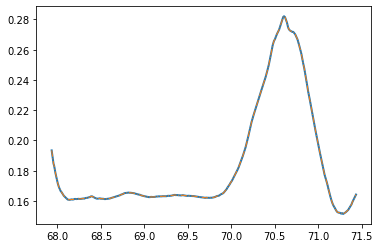

In [38]:
plt.ion()
fig, ax = plt.subplots()  # Create a figure containing a single axes.


ax.plot(rawTrialData['frameTime'], rawTrialData['paddlePos_x'],linewidth=2)
ax.plot(interpDF['frameTime'], interpDF[('paddlePos','x')],'-.',linewidth=1)


# Explore data

In [39]:
interpDF.keys()

MultiIndex([(     'frameTime',     ''),
            (     'cameraPos',    'x'),
            (     'cameraPos',    'y'),
            (     'cameraPos',    'z'),
            (     'cameraRot',    'x'),
            (     'cameraRot',    'y'),
            (     'cameraRot',    'z'),
            (        'camera', 'R0C0'),
            (        'camera', 'R0C1'),
            (        'camera', 'R0C2'),
            (        'camera', 'R0C3'),
            (        'camera', 'R1C0'),
            (        'camera', 'R1C1'),
            (        'camera', 'R1C2'),
            (        'camera', 'R1C3'),
            (        'camera', 'R2C0'),
            (        'camera', 'R2C1'),
            (        'camera', 'R2C2'),
            (        'camera', 'R2C3'),
            (        'camera', 'R3C0'),
            (        'camera', 'R3C1'),
            (        'camera', 'R3C2'),
            (        'camera', 'R3C3'),
            (       'ballPos',    'x'),
            (       'ballPos',    'y'),


In [40]:
interpDF['cameraPos'].head() - interpDF[('gaze-point-3d')].head()

,x,y,z
0,0.0181,1.1742,0.0169
1,0.0180,1.1743,0.0173
2,0.0180,1.1743,0.0176
3,0.0179,1.1745,0.0178
4,0.0177,1.1745,0.0180


In [111]:
def calcGIW(sessionDictIn):

    def calcGIW(rowIn):
        
        a =  rowIn['gaze-point-3d'] - rowIn['cameraPos']
        cycGIWDir_XYZ = a / np.linalg.norm(a)
        return {('cycGIWDir','x'): cycGIWDir_XYZ[0],('cycGIWDir','y'): cycGIWDir_XYZ[1],('cycGIWDir','z'): cycGIWDir_XYZ[2]}

    cycGIWDf = sessionDictIn['processedExp'].apply(lambda rowIn: calcGIW(rowIn),axis=1)
    cycGIWDf = pd.DataFrame.from_records(cycGIWDf)

    sessionDictIn['processed'] = sessionDictIn['processed'].join(cycGIWDf)
    logger.info('Added sessionDict[\'processedExp\'][\'cycGIWDir\']')

    return sessionDictIn

In [112]:

interpDF.apply(lambda rowIn: calcGIW(rowIn),axis=1)


KeyError: ('processedExp', 'occurred at index 0')